In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier


sns.set_theme(style="darkgrid")


## Load the dataset

In [2]:
train  = pd.read_csv("/Users/neha/Documents/Projects for Resume/Health_Insurance_Cross_Sell_Prediction/train.csv")
test = pd.read_csv("/Users/neha/Documents/Projects for Resume/Health_Insurance_Cross_Sell_Prediction/test.csv")

## Summarize the dataset

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )

Shape of train dataset  (381109, 12)
Shape of test dataset  (127037, 11)


In [6]:
print(train.isna().sum()) #Checking for null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [7]:
print(test.isna().sum()) #Checking for null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


## Descriptive statistics

In [8]:
#Statistical Summary of Numeric Variables
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis

### Response Variable

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Response', ylabel='count'>

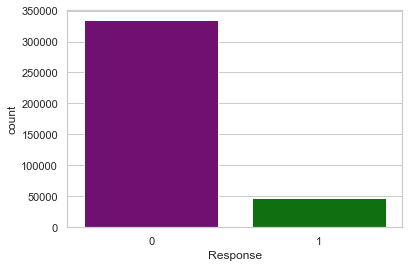

In [9]:
sns.set_theme(style="whitegrid")
sns.countplot(train['Response'],data=train,palette=['purple','green'])

-  ### There is class imbalance problem here. Less records for targert variable "1"

### Gender

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


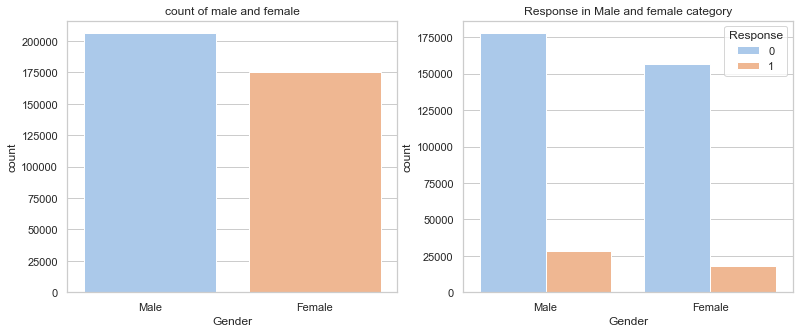

In [10]:
sns.set_palette("pastel")
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'])
plt.title("Response in Male and female category")
plt.show()

- ### The count of male is higher as compared to female.
- ### As well as probability of male buying the Vechile Insurance is higher as compared to female.

### Age

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


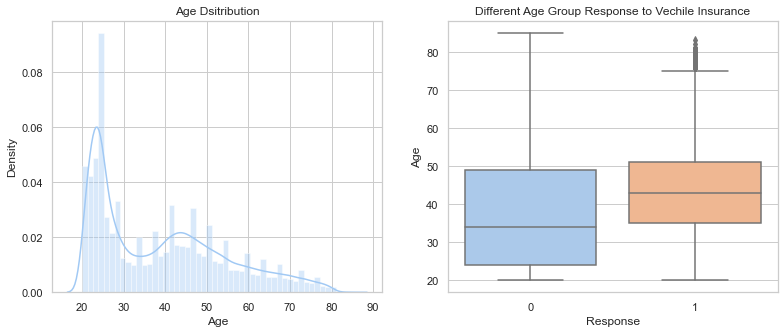

In [11]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.distplot(train.Age)
plt.title("Age Dsitribution")
plt.subplot(1,2,2)
sns.boxplot(train.Response,train.Age)
plt.title("Different Age Group Response to Vechile Insurance")
plt.show()

- ### Most of the customer are in the age group between 20 and 30

- ### Customer who are interested in vehicle insurance have a age bracket between 35 to 50

### Driving License

#### Count the number of people who doesn't have Driving license But has taken Insurance Previously.


In [12]:
len(train[(train['Driving_License']==0) & (train['Previously_Insured'] == 1)])

241

#### Count the number of people who doesn't have both Driving license, and Insurance

In [13]:
len(train[(train['Driving_License']==0) & (train['Previously_Insured'] == 0)])

571

#### Count the number of people who has both driving license,and insurance

In [14]:
len(train[(train['Driving_License']==1) & (train['Previously_Insured'] == 1)])

174387

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

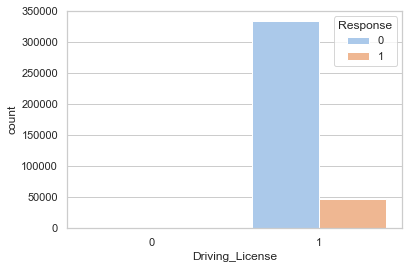

In [15]:
sns.countplot(train['Driving_License'],hue=train['Response'])

- ### Customers who are interested in Vehicle Insurance almost all have driving license

### Previously_Insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

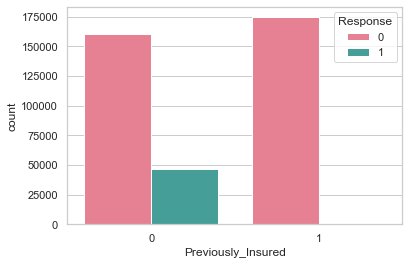

In [16]:
sns.countplot(x='Previously_Insured',hue='Response',data=train,palette='husl')

#### Customer who are not perviosly insured are likely to be inetrested

### Vehicle_Age

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

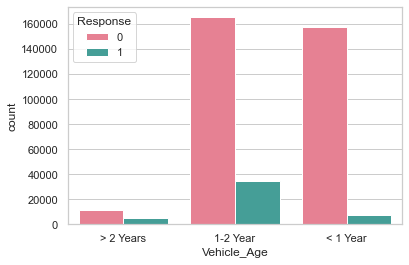

In [17]:
sns.countplot(x='Vehicle_Age',hue='Response',data=train,palette='husl')

- #### Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
- #### Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

### Annual_Premium

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


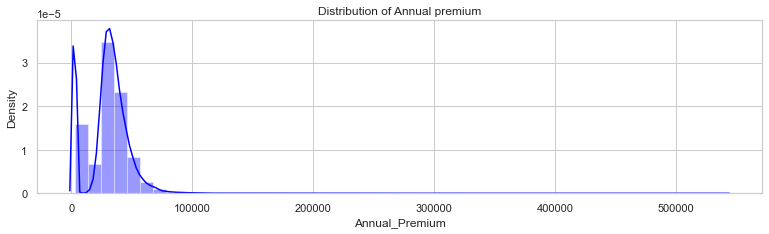

/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


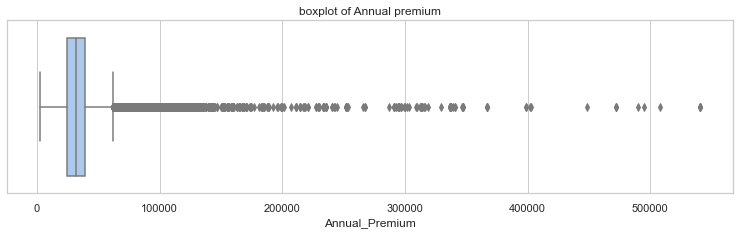

In [18]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'], color='blue')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

- #### From the distribution plot we can infer that the annual premimum variable is right skewed
- #### From the boxplot we can observe lot of outliers in the variable

### Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

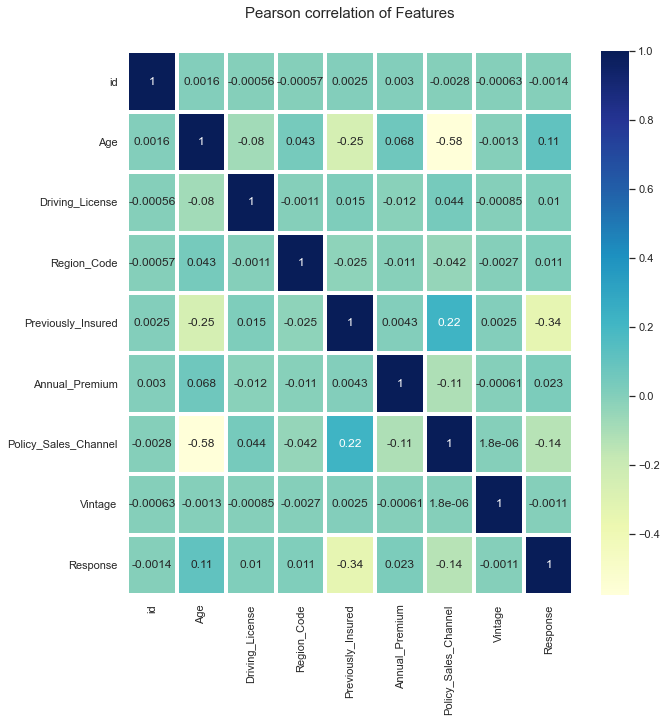

In [19]:
corr = train.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGnBu')

plt.title("Pearson correlation of Features", y=1.05, size=15)

## Preprocessing

In [20]:
GENDER_MAPPING = {'Female': 0, 'Male': 1}
VEHICLE_AGE_MAPPING = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
VEHICLE_DAMAGE_MAPPING = {'No': 0, 'Yes': 1}

train['Gender'] = train['Gender'].map(GENDER_MAPPING).astype(int)
test['Gender'] = test['Gender'].map(GENDER_MAPPING).astype(int)
train['Vehicle_Age'] = train['Vehicle_Age'].map(VEHICLE_AGE_MAPPING).astype(int)
test['Vehicle_Age'] = test['Vehicle_Age'].map(VEHICLE_AGE_MAPPING).astype(int)
train['Vehicle_Damage'] = train['Vehicle_Damage'].map(VEHICLE_DAMAGE_MAPPING).astype(int)
test['Vehicle_Damage'] = test['Vehicle_Damage'].map(VEHICLE_DAMAGE_MAPPING).astype(int)

### Splitting the dataset

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Response',axis=1),
                                                    train['Response'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= train['Response'])

### Standardization

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=train.drop('Response',axis=1).columns)
X_test = pd.DataFrame(X_test, columns=train.drop('Response',axis=1).columns)

#### Since the target variable is inbalance as a Oversample method used SMOTE to oversample minor class

In [23]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_sample(X_train,Y_train)

## Model Selection

#### Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not )
1. Logistic Regression
2. Random Forest

In [24]:
model=LogisticRegression()
model=model.fit(X_train,Y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(Y_test,pred)
recall_lr=recall_score(Y_test,pred)
precision_lr=precision_score(Y_test,pred)
f1score_lr=f1_score(Y_test,pred)
AUC_LR=roc_auc_score(pred,Y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(Y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.8773932285516868
ROC_AUC Score: 0.6660710961626274


In [25]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.45      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.67      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=55, n_jobs=-1)
rf.fit(X_train, Y_train)
y_predicted = rf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(Y_test, y_predicted))

print('\naccuracy')
print(accuracy_score(Y_test, y_predicted))
print('\nprecision')
print(precision_score(Y_test, y_predicted))


print('\nclassification report')
print(classification_report(Y_test, y_predicted)) # generate the precision, recall, f-1 score


confustion matrix
[[98661  1659]
 [12930  1083]]

accuracy
0.8723990448951746

precision
0.3949671772428884

classification report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100320
           1       0.39      0.08      0.13     14013

    accuracy                           0.87    114333
   macro avg       0.64      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



In [28]:
print("train Accuracy : ",rf.score(X_train,Y_train))
print("test Accuracy : ",rf.score(X_test,Y_test))

train Accuracy :  0.9999850061474795
test Accuracy :  0.8723990448951746


### Conclusion
- Customers of age between 30 to 60 are more likely to buy insurance.
- Customers with Driving License have higher chance of buying Insurance.
- Customers with Vehicle_Damage are likely to buy insurance.
- The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.